In [17]:
import import_ipynb
from Cosmology import Parameters
from EuclidChallenge_Setting import MyNoWiggleCosmology, MyCosmology, EuclidChallengePk, Sigma2
method ="Bias"
dataset = "Flagship"
b1, b2, b3, g2, g2x, g21, g21x, g3, g211, g22, g31 = Parameters(method)
rangek, PkTreeDM = MyCosmology(dataset) #k and Pk used for interpolations
rangek, PknwTreeDM = MyNoWiggleCosmology(dataset) #k and Pk no-wiggle used for interpolations
k, Pk = EuclidChallengePk(rangek, PkTreeDM) #k and Pk used for outputs
k, Pnwk = EuclidChallengePk(rangek, PknwTreeDM) #k and Pk no-wiggle used for output

In [18]:
def PkTreeLevel(kk, method, NL, redshift = 0.):

    # import Python modules for scientific computing and plotting 
    import numpy as np
    import import_ipynb
    import matplotlib.pyplot as plt

    #import the CosmoBolognaLib
    import CosmoBolognaLib as cbl
    from CosmoBolognaLib import Cosmology 

    import sys
    sys.path.insert(0, '/home/massimo/CosmoBolognaLib/Examples/clustering/output/')
    from ipynb.fs.full.FlagshipCosmology import getFlagshipCosmology as getFC

    # set the CosmoBolognaLib and the current directories
    cbl.SetDirs("/home/massimo/CosmoBolognaLib/", "./")

    # create an object of class Cosmology
    cosmo = getFC()   
    
    PkCAMB = np.asarray([cosmo.Pk(kk[i], method, NL, redshift) for i in range(len(kk))])
    #PkCAMB = cosmo.Pk(kk, method, NL, redshift)

    #PkCAMB = cosmo.xi_DM(kk[i], method, redshift, True, "test",NL)

    PkCAMB = [float(i) for i in PkCAMB]
    PkCAMB = np.asarray(PkCAMB)

    return PkCAMB

In [19]:
def DD(redshift):
    if redshift == "z0p9_":
        return 0.63178
    if redshift == "z1p2_":
        return 0.55868
    if redshift == "z1p5_":
        return 0.48880
    if redshift == "z1p8_":
        return 0.44589

In [20]:
redshift = "z0p9_"
binning = "s2_c1p5_" #s1_c1, s2_c1p5_, s3_c2

In [21]:
if redshift == "z1p8_":
    z = 1.8
if redshift == "z1p5_":
    z = 1.5
if redshift == "z1p2_":
    z = 1.2
if redshift == "z0p9_":
    z = 0.9

In [22]:
Pk =  ((DD(redshift)))**2*Pk
Pnwk = ((DD(redshift))**2)*Pnwk

PkTreeDM =  ((DD(redshift)))**2*PkTreeDM
PknwTreeDM = ((DD(redshift))**2)*PknwTreeDM

In [23]:
my_cols = ["k1", "k2", "k3", "k1eff", "k2eff", "k3eff", "P(k1)", "P(k2)", "P(k3)", "B(k)", "sigma^2", "n triangle"]

In [24]:
import pandas 
snapshot = pandas.read_table('../Data/flagship_measurements/snapshots_real_space/bispectrum/bispectrum_flagship_mod1_grid_540_bin_' + binning + redshift + 'full_kmax0p16.dat', 
                      names = my_cols, 
                      engine = 'python')

In [25]:
snapshot

k1             k2             k3          k1eff  \
0     2.01816513E+08 2.67620083E+02            NAN            NAN   
1     2.49332750E-03 2.49332750E-03 2.49332750E-03 3.79582570E-03   
2     5.81776417E-03 2.49332750E-03 2.49332750E-03 5.78208090E-03   
3     5.81776417E-03 5.81776417E-03 2.49332750E-03 6.60702700E-03   
4     5.81776417E-03 5.81776417E-03 5.81776417E-03 6.86924210E-03   
...              ...            ...            ...            ...   
11224 1.58741851E-01 1.58741851E-01 1.45444104E-01 1.59300333E-01   
11225 1.58741851E-01 1.58741851E-01 1.48768541E-01 1.59300184E-01   
11226 1.58741851E-01 1.58741851E-01 1.52092978E-01 1.59300274E-01   
11227 1.58741851E-01 1.58741851E-01 1.55417414E-01 1.59300404E-01   
11228 1.58741851E-01 1.58741851E-01 1.58741851E-01 1.59575164E-01   

               k2eff          k3eff          P(k1)          P(k2)  \
0                NAN            NAN            NAN            NAN   
1     3.25308890E-03 2.42592340E-03 4.53209646E+03 4.53209646E+03   
2     3.87984610E-03 3.10658060E-03 1.15752725E+04 4.53209646E+03   
3     5.67056040E-03 3.16817790E-03 1.15752725E+04 1.15752725E+04   
4     6.15038820E-03 5.40620040E-03 1.15752725E+04 1.15752725E+04   
...              ...            ...            ...            ...   
11224 1.58197354E-01 1.45463166E-01 2.49447878E+03 2.49447878E+03   
11225 1.58197315E-01 1.48788513E-01 2.49447878E+03 2.49447878E+03   
11226 1.58197352E-01 1.52117465E-01 2.49447878E+03 2.49447878E+03   
11227 1.58197400E-01 1.55435541E-01 2.49447878E+03 2.49447878E+03   
11228 1.58749900E-01 1.57921042E-01 2.49447878E+03 2.49447878E+03   

               P(k3)            B(k)        sigma^2     n triangle  
0                NAN             NAN            NAN            NAN  
1     4.53209646E+03  4.99310032E+09 5.05561360E+19 2.92200000E+03  
2     4.53209646E+03 -2.01690377E+09 2.75770470E+19 3.23000000E+03  
3     4.53209646E+03  7.14067600E+08 1.09845728E+19 1.13400000E+04  
4     1.15752725E+04  1.09026842E+09 2.59253947E+19 2.30880000E+04  
...              ...             ...            ...            ...  
11224 2.89429901E+03  7.04439328E+06 3.90337000E+12 4.97755780E+08  
11225 2.78921471E+03  5.38445366E+06 3.64340668E+12 5.13395810E+08  
11226 2.68636674E+03  4.65251595E+06 3.45157382E+12 5.21648790E+08  
11227 2.58129176E+03  1.00489755E+07 3.25649200E+12 5.32723970E+08  
11228 2.49447878E+03  7.36653041E+06 9.25269886E+12 5.42861890E+08  

[11229 rows x 12 columns]

In [26]:
import numpy as np
nparticles = snapshot['k1'][0]
invdensity = snapshot['k2'][0]

k1eff = np.asarray([snapshot['k1eff'][i] for i in range(1, len(snapshot))])
k2eff = np.asarray([snapshot['k2eff'][i] for i in range(1, len(snapshot))])
k3eff = np.asarray([snapshot['k3eff'][i] for i in range(1, len(snapshot))])

Pk1 = np.asarray([snapshot['P(k1)'][i] for i in range(1, len(snapshot))])
Pk2 = np.asarray([snapshot['P(k2)'][i] for i in range(1, len(snapshot))])
Pk3 = np.asarray([snapshot['P(k3)'][i] for i in range(1, len(snapshot))])

Pk_1 = PkTreeLevel(k1eff, "CAMB", False, z)
Pk_2 = PkTreeLevel(k2eff, "CAMB", False, z)
Pk_3 = PkTreeLevel(k3eff, "CAMB", False, z)

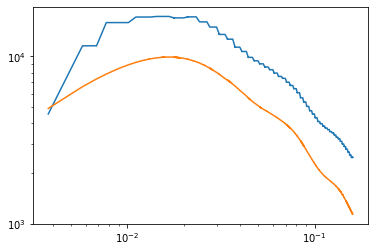

In [27]:
import matplotlib.pyplot as plt
plt.xscale("log")
plt.yscale("log")
plt.plot(k1eff, Pk1)
plt.plot(k1eff, Pk_1)

### Leading Order Bispectrum

$$B_{LO} = \Gamma(k_1, k_2)_{tree}[P_{nw}(k_1)P_{nw}(k_2)+ e^{-k_1^2 \Sigma^2}P_{w}(k_1)P_{nw}(k_2) + e^{-k_2^2 \Sigma^2}P_{w}(k_1)P_{nw}(k_2)] + cyc$$ 

In [28]:
import import_ipynb
import TreeLevelBispectrum_IR
from TreeLevelBispectrum_IR import C1Btree, C2Btree, C3Btree, BLOb1, BLOb2, BLOg2

$$\Sigma^2 = \frac{1}{6\pi^2}\int_0^{k_s}dq P_{nw}(q)\left[1-j_0\left(q\,l_{OSC}\right)+2j_2\left(q\,l_{OSC}\right)\right]$$

In [29]:
S2 = Sigma2(rangek, PknwTreeDM)[0]
print(S2)

8.691189549927968


In [30]:
import numpy as np
import time 
start_time = time.time()
BkLOb1 = np.array([BLOb1(k1eff[i], k2eff[i], k3eff[i], rangek, PkTreeDM, PknwTreeDM, S2) for i in range(len(k3eff))])
BkLOb2 = np.array([BLOb2(k1eff[i], k2eff[i], k3eff[i], rangek, PkTreeDM, PknwTreeDM, S2) for i in range(len(k3eff))])
BkLOg2 = np.array([BLOg2(k1eff[i], k2eff[i], k3eff[i], rangek, PkTreeDM, PknwTreeDM, S2) for i in range(len(k3eff))])
print("--- Tree-Level Bispectrum computational time -- Flagship snapshot %s seconds ---" % (time.time() - start_time))

--- Tree-Level Bispectrum computational time -- Flagship snapshot 34.44442415237427 seconds ---


$$B_{\rm stoch}(k_1, k_2, k_3) = b_1^2(1+\alpha_1)\left[ P_L(k_1) + P_L(k_2) + P_L(k_3) \right]\bar n^{-1} + (1+\alpha_2)\bar n^{-2} $$

In [31]:
import time 
start_time = time.time()
Bstoch_1 = np.array([(Pk_1[i] + Pk_2[i] + Pk_3[i])*invdensity for i in range(len(k1eff))])
Bstoch_2 = np.array([invdensity**2 for i in range(len(k1eff))] )
print("--- Stochastic Bispectrum computational time -- Flagship snapshot %s seconds ---" % (time.time() - start_time))

--- Stochastic Bispectrum computational time -- Flagship snapshot 0.03629159927368164 seconds ---


In [32]:
import pandas as pd 
MyData = {'k1eff': k1eff, 
          'k2eff': k2eff, 
          'k3eff': k3eff, 
          'BLOb1': BkLOb1, 
          'BLOb2': BkLOb2, 
          'BLOg2': BkLOg2,
          'Bsto_b1^2': Bstoch_1, 
          'Bsto_b1^2alpha1': Bstoch_1,
          'PoisStoc': Bstoch_2,
          'alpha2': Bstoch_2}

keys = ['k1eff', 'k2eff', 'k3eff', 'BLOb1', 'BLOb2', 'BLOg2', 'Bsto_b1^2', 'Bsto_b1^2alpha1', 'PoisStoc', 'alpha2']
pd.options.display.float_format = '{:.8E}'.format
df = pd.DataFrame(MyData, columns = keys)

import numpy as np
header = '%0s\t%0s\t%0s\t%0s\t%0s\t%0s\t%0s\t%0s\t%0s\t%0s\t'%('k1eff', 'k2eff', 'k3eff', 'BLOb1', 'BLOb2', 'BLOg2', 'Bsto_b1^2', 'Bsto_b1^2alpha1', 'PoisStoc', 'alpha2')

np.savetxt(r'../Data/flagship_modelling/bispectrum_tree_IR_'+ binning + redshift + 'MassimoG_no_pi.dat', df, fmt='%0.7e', header=header, comments='' )